<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None




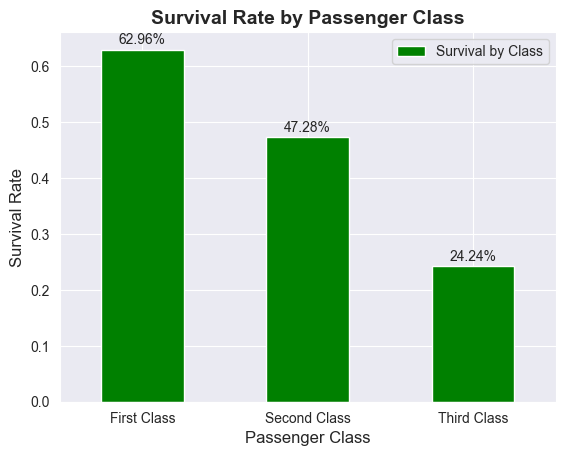

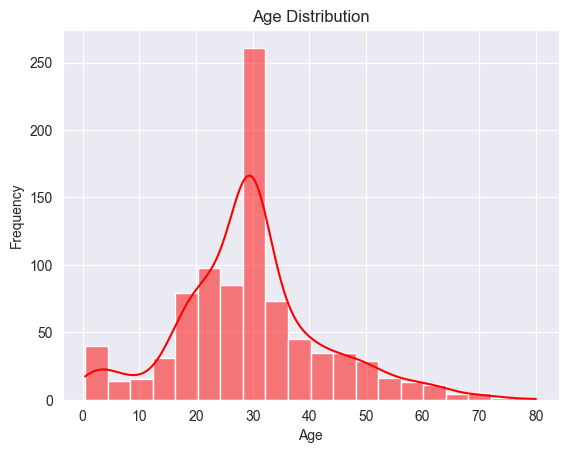

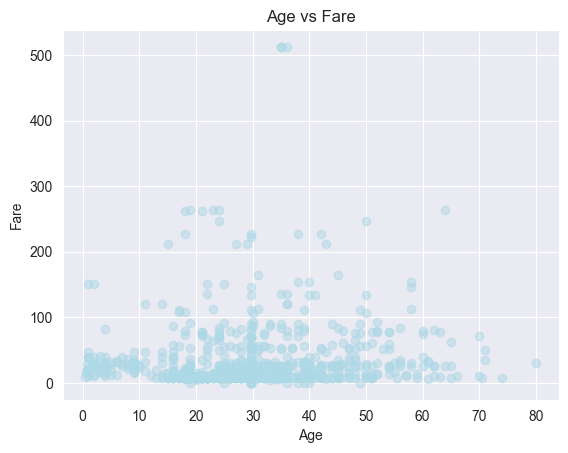

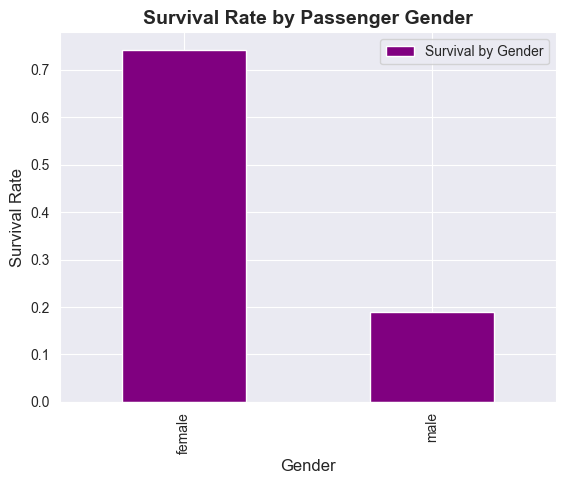

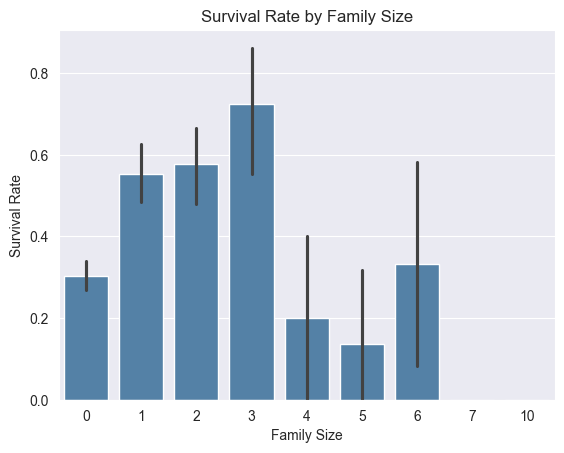

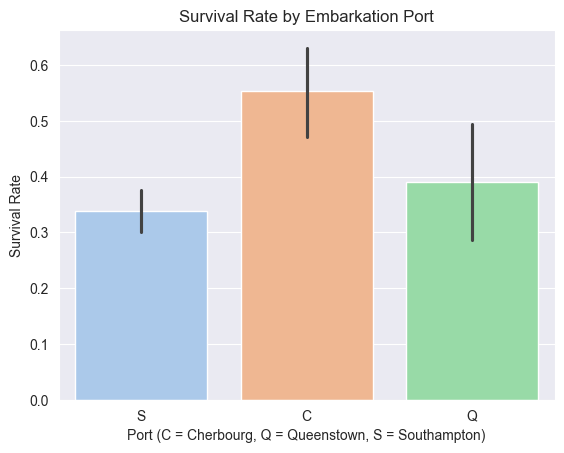

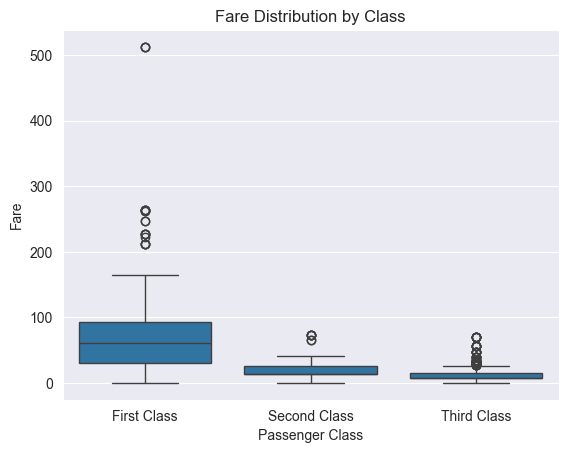

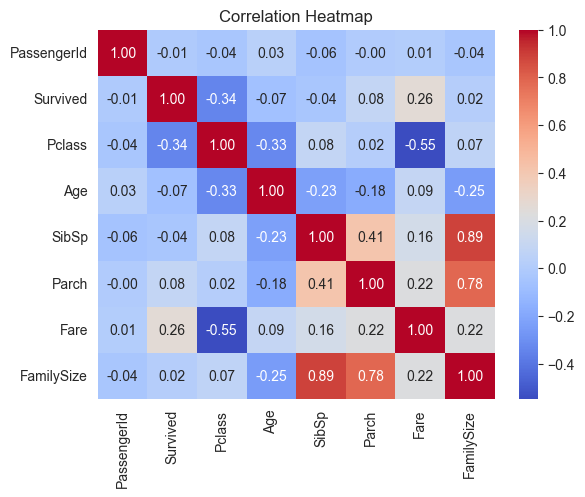

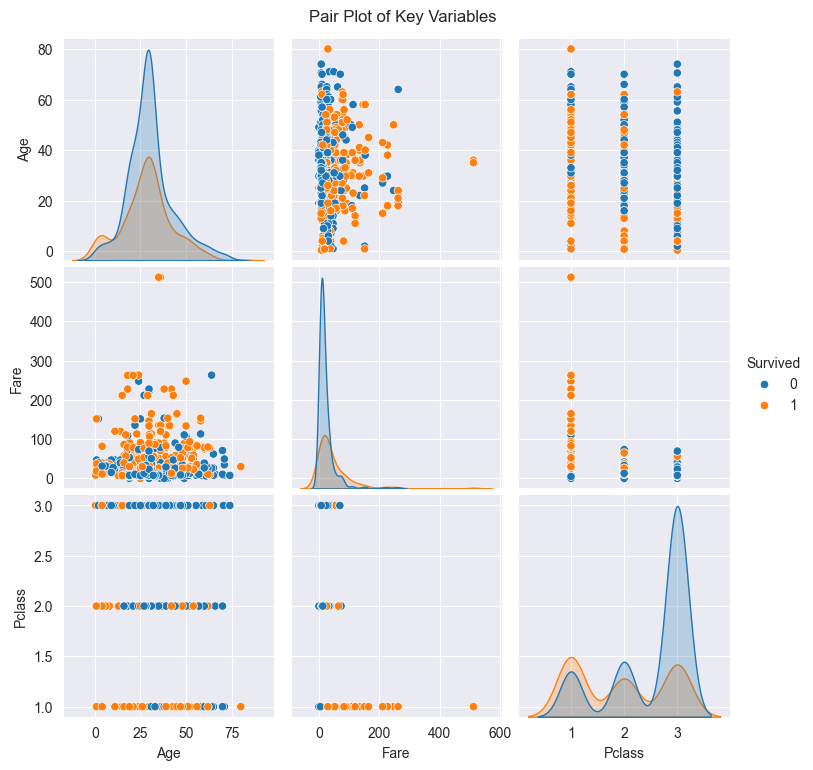

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("data/titanic.csv")

# Print dataset details
print(df.info())
print("\n")

# Data cleaning
# 1. Handle missing values
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# 2. Remove duplicates
df = df.drop_duplicates()

# 3. Data filtering - Find first class passengers
first_class = df[df["Pclass"] == 1]

# Data visualisation
# 1. Bar chart - Survival Rate by Class
survivors = df.groupby("Pclass")["Survived"].mean()
survivors_plot = survivors.plot(kind="bar", color="green", label="Survival by Class")

survivors_plot.set_xticklabels(["First Class", "Second Class", "Third Class"], rotation=0)

survivors_plot.set_title("Survival Rate by Passenger Class", fontsize=14, fontweight='bold')
survivors_plot.set_xlabel("Passenger Class", fontsize=12)
survivors_plot.set_ylabel("Survival Rate", fontsize=12)
survivors_plot.legend(loc="upper right", fontsize=10)

for i, v in enumerate(survivors):
    survivors_plot.text(i, v + 0.01, f"{v:.2%}", ha='center', fontsize=10)

plt.show()

# 2. Histogram - Age distribution
sns.histplot(df["Age"], kde=True, bins=20, color="red")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# 3. Scatter plot - Age vs Fare
plt.scatter(df["Age"], df["Fare"], alpha=0.5, color="lightblue")
plt.title("Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

# 4. Bar chart - Survival rate by Gender
survivors_by_gender = df.groupby("Sex")["Survived"].mean()
survivors_gender_plot = survivors_by_gender.plot(kind="bar", color="purple", label="Survival by Gender")

survivors_gender_plot.set_title("Survival Rate by Passenger Gender", fontsize=14, fontweight='bold')
survivors_gender_plot.set_xlabel("Gender", fontsize=12)
survivors_gender_plot.set_ylabel("Survival Rate", fontsize=12)
survivors_gender_plot.legend(loc="upper right", fontsize=10)
plt.show()

# 5. Bar plot - Survival rate by family size
df["FamilySize"] = df["SibSp"] + df["Parch"]
sns.barplot(x="FamilySize", y="Survived", data=df, color="steelblue")
plt.title("Survival Rate by Family Size")
plt.ylabel("Survival Rate")
plt.xlabel("Family Size")
plt.show()

# 6. Bar plot - Survival rate by embarkation port
sns.barplot(x="Embarked", y="Survived", hue="Embarked", data=df, palette="pastel", legend=False)
plt.title("Survival Rate by Embarkation Port")
plt.xlabel("Port (C = Cherbourg, Q = Queenstown, S = Southampton)")
plt.ylabel("Survival Rate")
plt.show()

# 7. Box plot - Fare distribution by class
sns.boxplot(x="Pclass", y="Fare", data=df)

plt.xticks(ticks=[0, 1, 2], labels=["First Class", "Second Class", "Third Class"])
plt.title("Fare Distribution by Class")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.show()

# 8. Heatmap - Correlation matrix
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 9. Pair plot
sns.pairplot(df[["Age", "Fare", "Pclass", "Survived"]], hue="Survived", diag_kind="kde")
plt.suptitle("Pair Plot of Key Variables", y=1.02)
plt.show()